In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [3]:
#构建sigmoid函数
def sigmoid(z):  
    return 1 / (1 + np.exp(-z))

def predict(theta, X):  
    prob = sigmoid(X * theta.T) #根据sigmoid函数预测admit的概率
    return [1 if a >= 0.5 else 0 for a in prob] #根据admit的概率设定阈值，大于0.5计为1，否则为0

In [27]:
#梯度下降算法函数,X/y是输入变量，theta是参数，alpha是学习率，m是实例，numIter梯度下降迭代次数
def gradientDescent(x, y, theta, alpha, m, numIter):
    XTrans = x.transpose() #矩阵转置
    #在1-numIterations之间for循环
    for i in range(0,numIter):
        theta = np.matrix(theta)  #将theta转化为矩阵
        pred = np.array(predict(theta, x)) #将预测值转化为数组
        loss = pred - y #预测值减去实际值
        gradient = np.dot(XTrans, loss) / m  #计算梯度
        theta = theta - alpha * gradient #参数theta的计算，即更新法则
    return theta

In [28]:
df = pd.read_csv('../data/logisitic_admit.csv') #读取csv数据
df.head()

,admit,gre,gpa
0,0,380,3.61
1,1,660,3.67
2,1,800,4.00
3,0,640,3.19
4,0,520,2.93


In [29]:
len(df)

400

In [30]:
df.insert(1, 'Ones', 1)  #在df插入全为1的一列
df.head(10) #展示df列表前10行

,admit,Ones,gre,gpa
0,0,1,380,3.61
1,1,1,660,3.67
2,1,1,800,4.00
3,0,1,640,3.19
4,0,1,520,2.93
5,1,1,760,3.00
6,0,1,560,2.98
7,0,1,400,3.08
8,1,1,540,3.39
9,1,1,700,3.92


Text(0, 0.5, 'gpa')

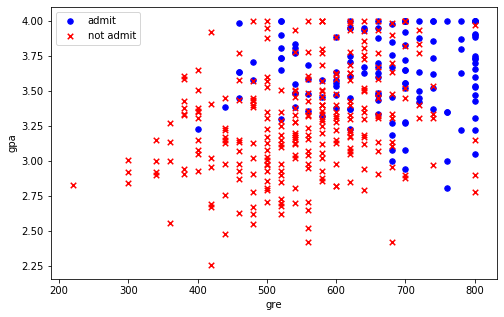

In [31]:
#对训练集中的数据进行可视化
positive = df[df['admit'] == 1] #把admit为1的数据筛选出来形成单独的数据集
negative = df[df['admit'] == 0] #把admit为0的数据筛选出来形成单独的数据集  
  
fig, ax = plt.subplots(figsize=(8,5))  #创建子图，大小为8*5
ax.scatter(positive['gre'], positive['gpa'], s=30, c='b', marker='o', label='admit')
#构建positive的散点图，设置散点形状为o
ax.scatter(negative['gre'], negative['gpa'], s=30, c='r', marker='x', label='not admit')  
#构建positive的散点图，设置散点形状为x
ax.legend()  #设置图例
ax.set_xlabel('gre')  #设置x轴标签
ax.set_ylabel('gpa')  #设置y轴标签

In [32]:
x = df.iloc[:,1:4]  #取df的后3列为X变量
y = df['admit'] #设置y变量

# 把X、y转化为数组形式，以便于计算
x = np.array(x.values)  
y = np.array(y.values)  

In [33]:
y

array([0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [34]:
m, n = np.shape(x)  #设置训练样本值m，变量个数n
m,n

(400, 3)

In [35]:
theta = np.ones(n) #初始化
x.shape, theta.shape, y.shape #检查X与y的行列数，是否一致

((400, 3), (3,), (400,))

In [36]:
numIter = 1000  #迭代次数
alpha = 0.00001  #学习率
theta = gradientDescent(x, y, theta, alpha, m, numIter)
#采用构造的gradientDescent求解theta
print(theta)

[[ 0.99737128 -0.007331    0.99182223]]


In [39]:
pred = predict(theta, x) #采用sigmiod函数来预测y
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(pred, y)] 
#将预测为1.实际也为1；预测为0.实际也为0的均记为1
accuracy = (sum(map(int, correct)) % len(correct))  
#采用加总correct值来计算预测对的个数
print('accuracy = {:.2f}%'.format(100*accuracy/m)) #打印预测准确率
print (pred)

accuracy = 36.50%
[1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 

In [41]:
lf = LogisticRegression() #设置算法为逻辑回归
lf.fit(x,y)  #用逻辑回归拟合

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
lf.coef_  #基于sklearn得到的参数值

array([[-1.86535882e-06,  9.46245257e-03,  2.11551391e+00]])

In [44]:
pred_sk = lf.predict(x)  #预测
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(pred_sk, y)] 
#将预测为1.实际也为1；预测为0.实际也为0的均记为1
accuracy = (sum(map(int, correct)) % len(correct))  #计算预测对的个数
print('accuracy = {:.2f}%'.format(100*accuracy/m))  #打印预测准确率

accuracy = 75.50%


In [45]:
print(pred_sk)

[0 1 1 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 1
 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0
 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0
 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0
 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1
 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1]


In [46]:
lf.score(x,y)  #采用sklearn的score函数打印准确率得分

0.755